In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv("Downloads/mental_health dataset.zip")

# Data Cleaning and Manipulation

In [4]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [5]:
df.tail()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292363,2/1/2016 23:04,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [6]:
df.shape

(292364, 17)

In [7]:
df.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [9]:
df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [10]:
df.dropna(subset=['self_employed'], inplace=True)

In [11]:
df.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [12]:
df.drop('Timestamp', axis=1, inplace=True)

In [13]:
df.describe()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162
unique,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,235950,168056,65173,257994,173668,144744,62429,98225,107579,102179,99272,151609,103964,101559,229304,116502


In [14]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('               ')
    print('--------------------------------------------------------------')

Gender
['Female' 'Male']
               
--------------------------------------------------------------
Country
['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland' 'Israel' 'Italy' 'Bosnia and Herzegovina'
 'Singapore' 'Nigeria' 'Croatia' 'Thailand' 'Denmark' 'Mexico' 'Greece'
 'Moldova' 'Colombia' 'Georgia' 'Czech Republic' 'Philippines']
               
--------------------------------------------------------------
Occupation
['Corporate' 'Student' 'Business' 'Housewife' 'Others']
               
--------------------------------------------------------------
self_employed
['No' 'Yes']
               
--------------------------------------------------------------
family_history
['Yes' 'No']
               
--------------------------------------------------------------
treatment
['Yes' 'No']
               
-

In [15]:
dropped_rows = df[df['self_employed'].isnull()]
df = pd.concat([df, dropped_rows], ignore_index=True)

In [16]:
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [17]:
df.tail()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
287157,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
287158,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
287159,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
287160,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
287161,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


# Data Analysis

### Gender Distribution

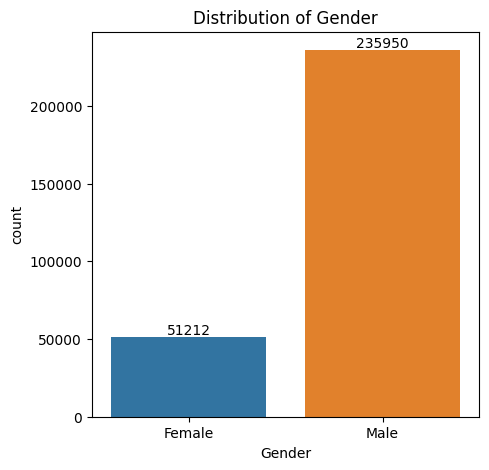

In [18]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df,x="Gender",hue="Gender",legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Distribution of Gender")
plt.show()

In [52]:
#From the above chart we can analyze that:
#The ratio of males to females in the dataset is approximately 235950/51212​,
#which is roughly 4.61 males for every female.

### Mental Health impact on different genders

In [19]:
g=df.groupby(['Gender', 'Mental_Health_History']).size().reset_index(name='Countx')
print(g)

   Gender Mental_Health_History  Countx
0  Female                 Maybe   18644
1  Female                    No   16874
2  Female                   Yes   15694
3    Male                 Maybe   75020
4    Male                    No   85305
5    Male                   Yes   75625


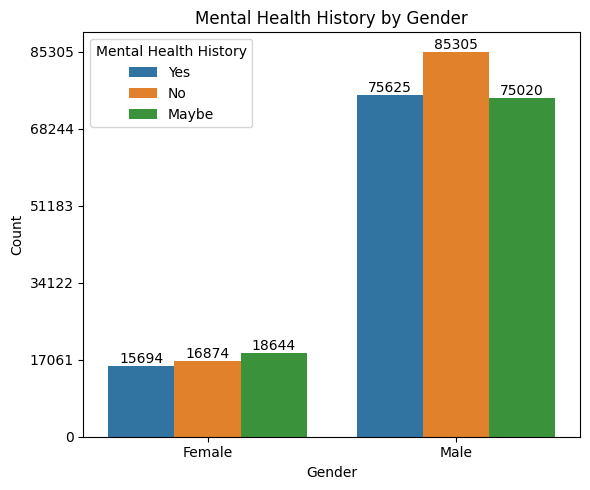

In [20]:
plt.figure(figsize=(6, 5))
abx=sns.countplot(x='Gender', hue='Mental_Health_History',data=df)
for container in abx.containers:
    abx.bar_label(container)

max_count = g['Countx'].max()
plt.yticks(range(0, max_count+1, max_count//5))


plt.title('Mental Health History by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Mental Health History')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Chi-square test:

In [62]:
# Observed frequencies
observed = [[18644, 16874, 15694], [75020, 85305, 75625]]

# chi-square test
chi2_stat, p_val, _, _ = stats.chi2_contingency(observed)

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-square statistic: 421.8508961591961
P-value: 2.4902434476902594e-92


In [ ]:
#Based on above data visualization and statistical testing, we can analyze that:
    # "Maybe" Response:
    #     Female: 36.42%
    #     Male: 31.79%
# A higher percentage of females (36.42%) responded "Maybe" compared to males (31.79%). 
# This suggests that a relatively larger proportion of females are uncertain or have mixed feelings about their mental health history compared to males.
     # "No" Response:
     #     Female: 32.96%
     #     Male: 36.14%
# A higher percentage of males (36.14%) responded "No" compared to females (32.96%). 
# This indicates that a larger proportion of males deny having a mental health history compared to females.
     # "Yes" Response:
     #     Female: 30.62%
     #     Male: 32.07%
# The percentage of respondents answering "Yes" to having a mental health history is slightly higher among males (32.07%) compared to females (30.62%). 
# However, the difference is not as pronounced as in the other response categories.

In [ ]:
# The extremely low p-value (approximately 2.49e-92) indicates strong evidence against the null hypothesis. In other words:
# Conclusion: 
# We reject the null hypothesis of independence between gender and mental health history responses. 
# This means that there is a significant association between gender and mental health history responses in the dataset.
# Therefore, based on the chi-square test results, we can confidently state that there is a statistically significant relationship 
# between gender and mental health history responses in the provided data.

### Distribution of Countries

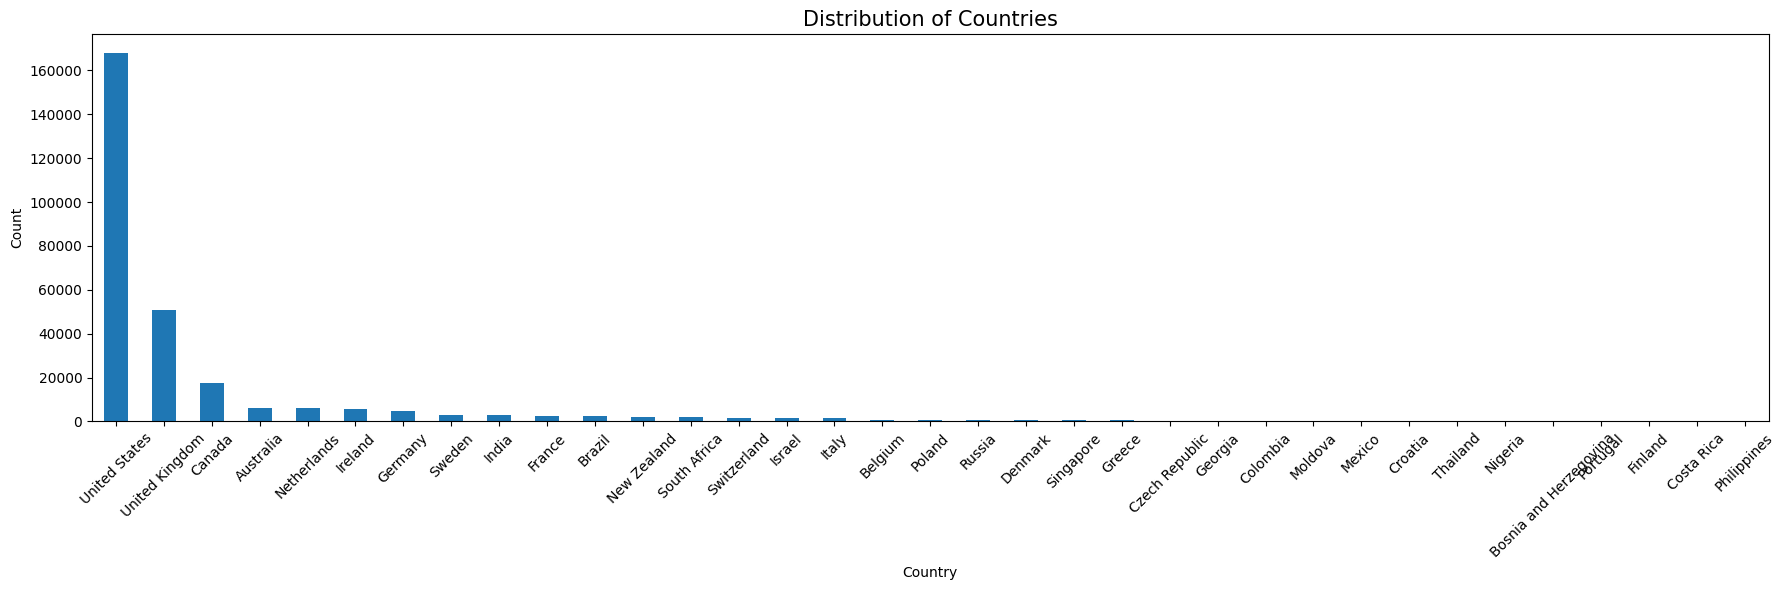

In [21]:
country_counts = df['Country'].value_counts()

plt.figure(figsize=(18, 6))
country_counts.plot(kind='bar')
plt.title('Distribution of Countries', fontsize=15)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Based on above data visualization, we can analyze that:
# Maximum number of mental health history is from the United States only.

### Distribution of Occupation

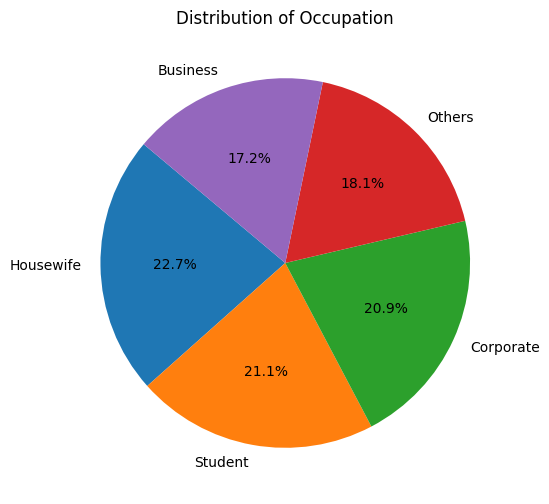

In [22]:
occ_counts = df['Occupation'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(occ_counts, labels=occ_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Occupation')
plt.show()

### Occupation's impact on stress

In [38]:
gb=df.groupby(['Occupation', 'Growing_Stress']).size().reset_index(name='Count')
print(gb)

   Occupation Growing_Stress  Count
0    Business          Maybe  16747
1    Business             No  13958
2    Business            Yes  18547
3   Corporate          Maybe  16747
4   Corporate             No  19905
5   Corporate            Yes  23505
6   Housewife          Maybe  23741
7   Housewife             No  22192
8   Housewife            Yes  19240
9      Others          Maybe  18075
10     Others             No  18680
11     Others            Yes  15138
12    Student          Maybe  22915
13    Student             No  16348
14    Student            Yes  21424


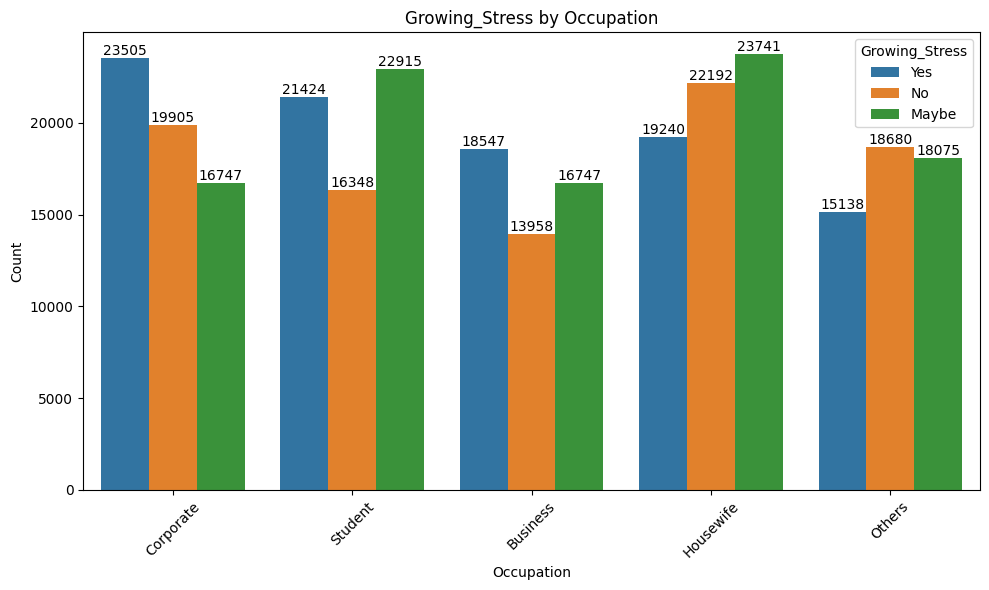

In [44]:
plt.figure(figsize=(10, 6))
ab=sns.countplot(x='Occupation', hue='Growing_Stress', data=df)
for container in ab.containers:
    ab.bar_label(container)
    
plt.title('Growing_Stress by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Growing_Stress')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

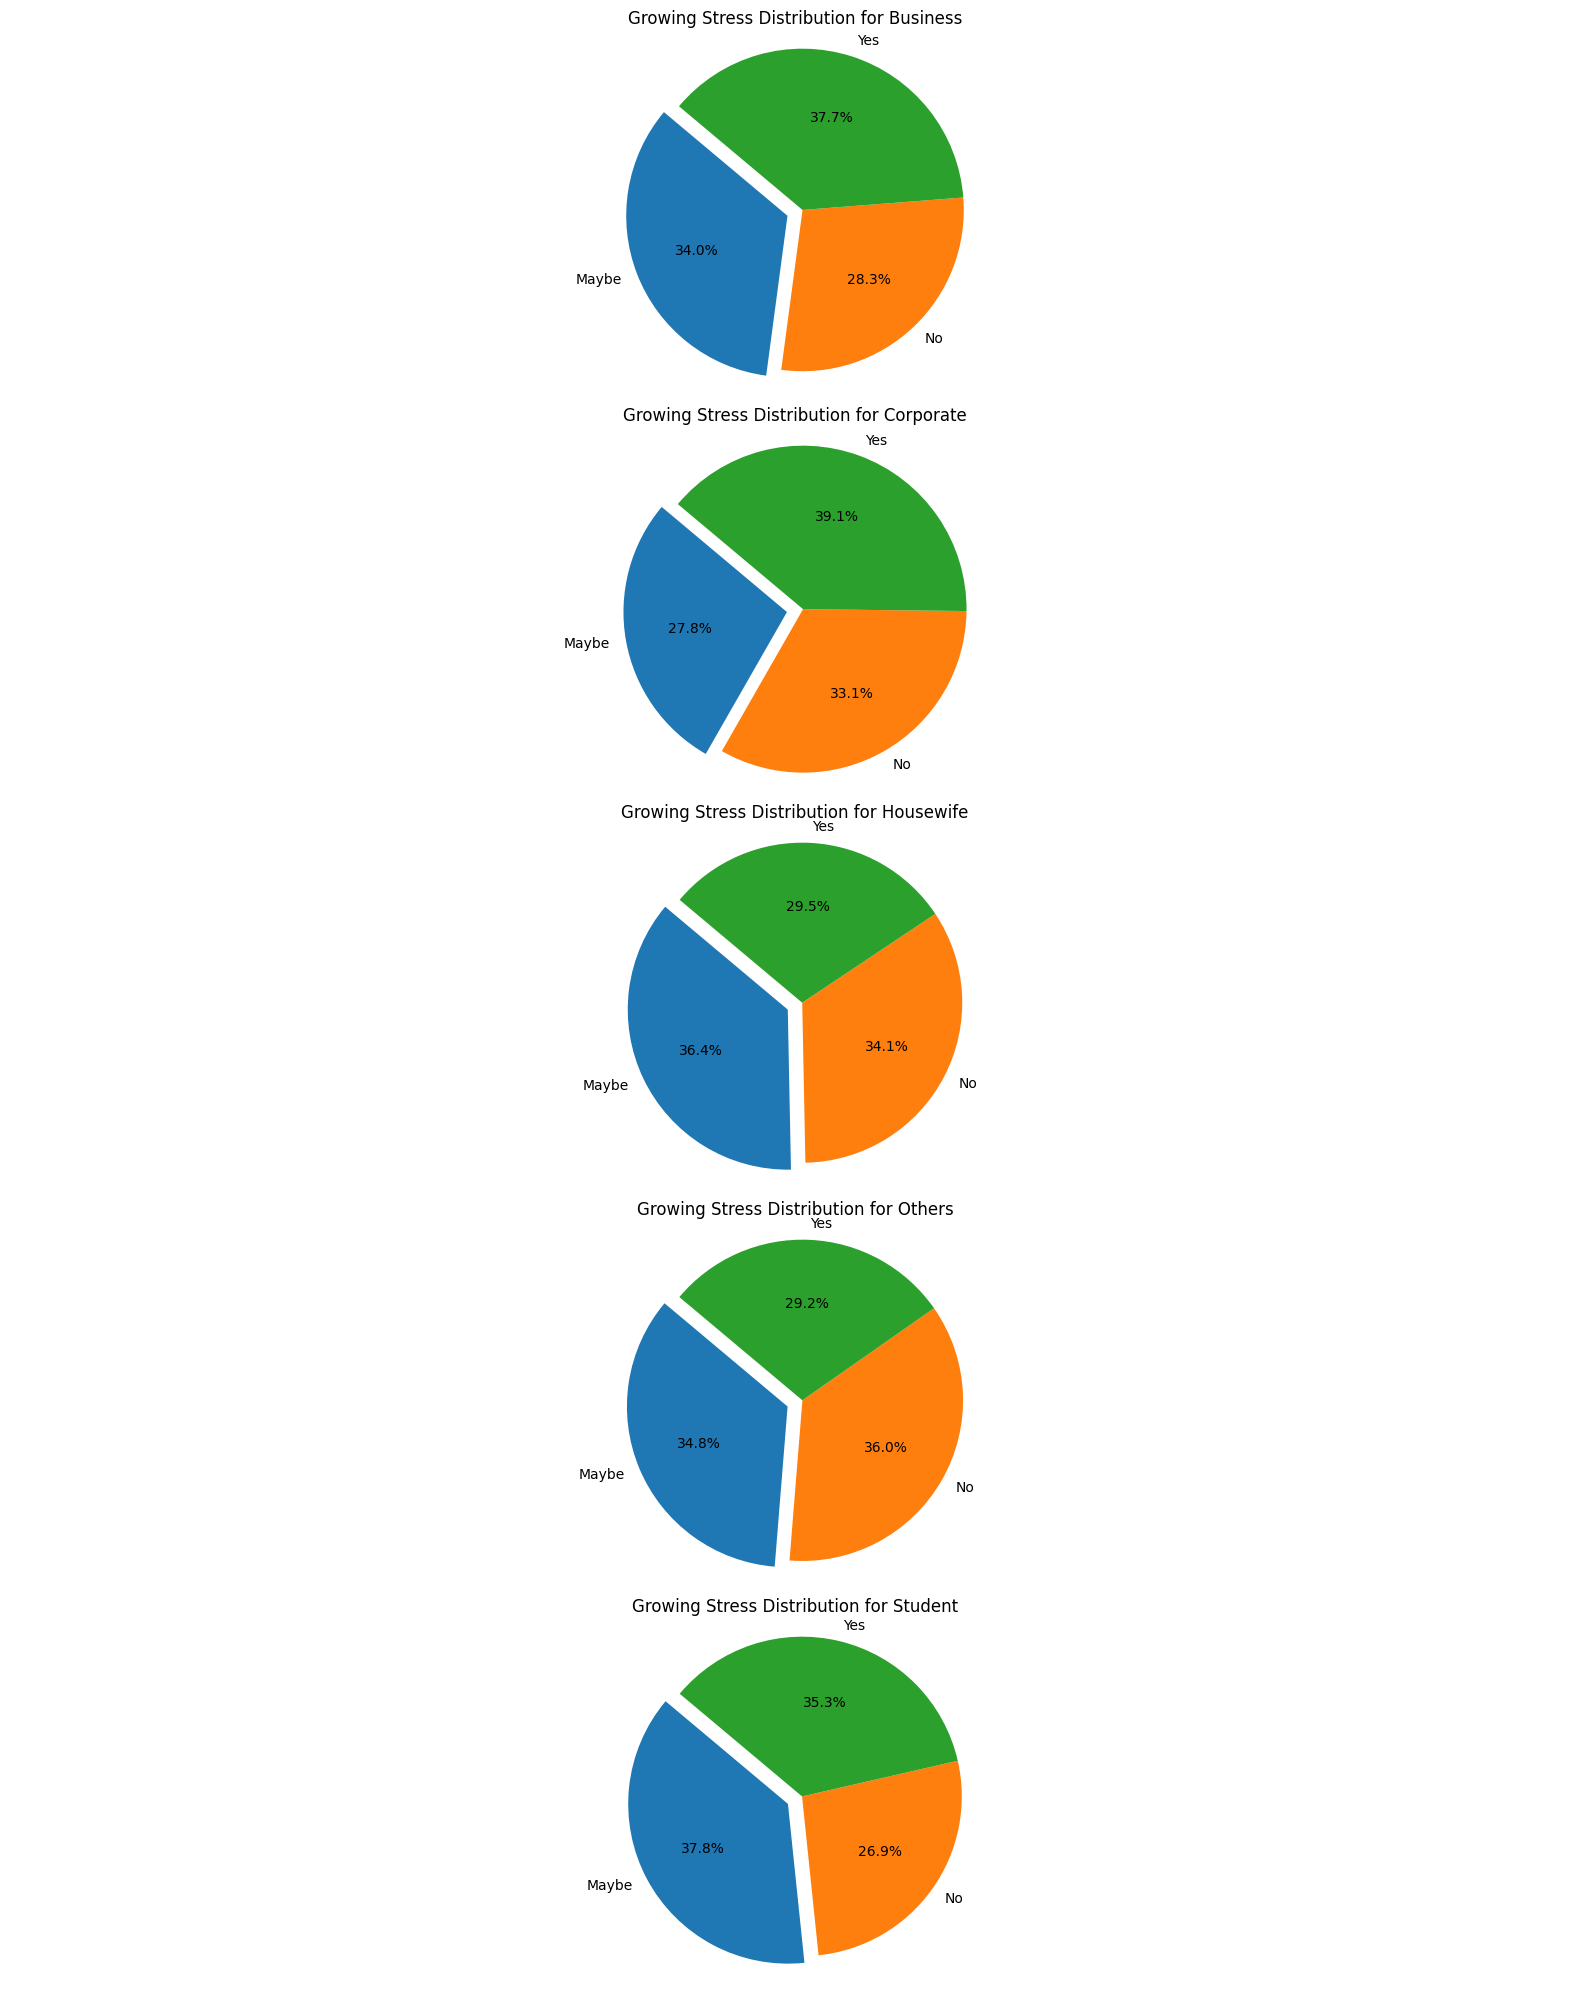

In [60]:
occupations = gb['Occupation'].unique()
num_occupations = len(occupations)

plt.figure(figsize=(16, 4 * num_occupations))

for i, occupation in enumerate(occupations, start=1):
    plt.subplot(num_occupations, 1, i)
    data_subset = gb[gb['Occupation'] == occupation]
    labels = data_subset['Growing_Stress']
    sizes = data_subset['Count']
    explode = (0.1, 0, 0)  # explode the 1st slice (Maybe)
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Growing Stress Distribution for {occupation}')
    plt.axis('equal')  

plt.tight_layout()
plt.show()

In [ ]:
# Based on above data:
#     Among the occupation categories, Corporate workers have the highest percentage (45.77%) of respondents indicating "Yes" to growing stress levels.
#     Business and Housewife categories show a relatively balanced distribution across "Maybe," "No," and "Yes" responses.
#     Students have the highest percentage (41.27%) of respondents indicating uncertainty ("Maybe") regarding their growing stress levels.
#     The "No" response is relatively higher among Housewives (35.34%) and Others (38.35%) compared to other occupations.

### Occupation's impact 

In [41]:
gbs=df.groupby(['Occupation', 'Mental_Health_History']).size().reset_index(name='Count')
print(gbs)

   Occupation Mental_Health_History  Count
0    Business                 Maybe  12984
1    Business                    No  20362
2    Business                   Yes  15906
3   Corporate                 Maybe  22900
4   Corporate                    No  18931
5   Corporate                   Yes  18326
6   Housewife                 Maybe  23136
7   Housewife                    No  21926
8   Housewife                   Yes  20111
9      Others                 Maybe  14312
10     Others                    No  18311
11     Others                   Yes  19270
12    Student                 Maybe  20332
13    Student                    No  22649
14    Student                   Yes  17706


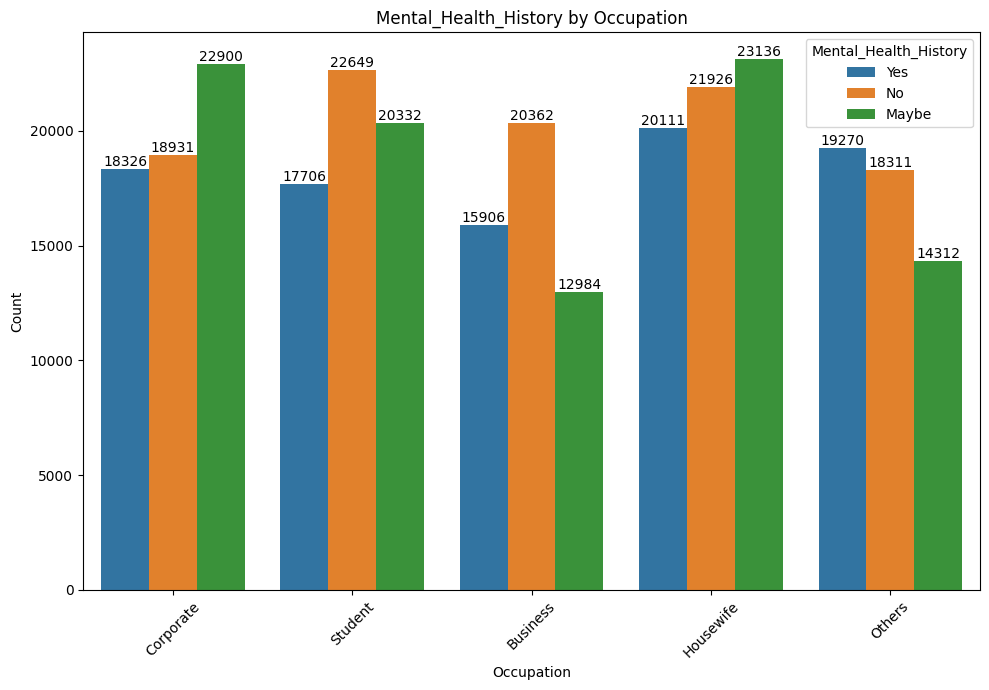

In [46]:
plt.figure(figsize=(10, 7))
ab=sns.countplot(x='Occupation', hue='Mental_Health_History', data=df)
for container in ab.containers:
    ab.bar_label(container)
    
plt.title('Mental_Health_History by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Mental_Health_History')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Based on above data,we have:
# Percentage Distribution by Occupation:
#     Occupation	Maybe (%)	No (%)	Yes (%)
#     Business	   28.55	  44.85	   26.60
#     Corporate	   38.07	  31.47	   30.46
#     Housewife	   37.90	  35.91	   26.18
#     Others	    29.88	  38.24	   31.88
#     Student	    37.56	  41.78	   20.66

#     Corporate workers have the highest percentage (38.07%) of respondents reporting "Maybe" regarding their mental health history, 
#     indicating uncertainty.
#     Housewives and Students show relatively balanced distributions across "Maybe," "No," and "Yes" responses.
#     Respondents from Business and Others categories have higher percentages of "No" responses (44.85% and 38.24%, respectively), 
#     indicating a denial of mental health history.
#     Students have the highest percentage (41.78%) of respondents acknowledging ("No" response) their mental health history, 
#     suggesting awareness or openness about mental health issues.

# The distribution of mental health history responses varies significantly across different occupational groups, 
# highlighting diverse attitudes and perceptions toward mental health.
# The higher percentage of "Maybe" responses among Corporate workers may indicate a need for targeted mental health awareness 
#and support programs in corporate settings.

# The analysis reveals distinct patterns in mental health history responses among various occupations. 
# Understanding these patterns is crucial for developing tailored mental health interventions and support systems to address the diverse needs 
# and perceptions of different occupational groups.

### Distribution of self employed people

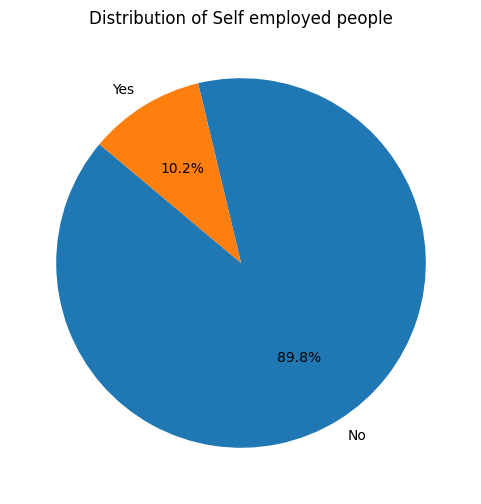

In [25]:
se_counts = df['self_employed'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(se_counts, labels=se_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Self employed people')
plt.show()

### Self employment's impact 

In [26]:
gb1=df.groupby(['self_employed', 'Mental_Health_History']).size().reset_index(name='Count1')
print(gb1)

  self_employed Mental_Health_History  Count1
0            No                 Maybe   84250
1            No                    No   91731
2            No                   Yes   82013
3           Yes                 Maybe    9414
4           Yes                    No   10448
5           Yes                   Yes    9306


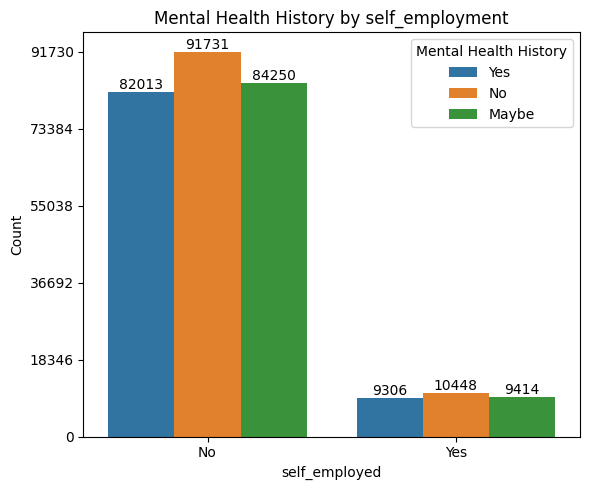

In [27]:
plt.figure(figsize=(6, 5))
ab1=sns.countplot(x='self_employed', hue='Mental_Health_History',data=df)
for container in ab1.containers:
    ab1.bar_label(container)

max_count = gb1['Count1'].max()
plt.yticks(range(0, max_count+1, max_count//5))


plt.title('Mental Health History by self_employment')
plt.xlabel('self_employed')
plt.ylabel('Count')
plt.legend(title='Mental Health History')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Based on above data, we can observe that out of total data only 29,168 people are self employed which is very much less compared to total strength.
#and
# Self-employed individuals have a higher percentage (38.61%) of "Maybe" responses regarding their mental health history compared to non-self-employed 
# individuals (30.89%).
# Both self-employed and non-self-employed individuals show similar percentages of "No" responses, indicating denial of mental health history 
# (33.66% for self-employed and 33.66% for non-self-employed).
# Non-self-employed individuals have a slightly higher percentage (35.45%) of "Yes" responses compared to self-employed individuals (28.03%), 
# indicating a higher acknowledgment of mental health history among non-self-employed individuals.

### Family History's impact

In [28]:
gb2=df.groupby(['family_history', 'Mental_Health_History']).size().reset_index(name='Count2')
print(gb2)

  family_history Mental_Health_History  Count2
0             No                 Maybe   56158
1             No                    No   62134
2             No                   Yes   55376
3            Yes                 Maybe   37506
4            Yes                    No   40045
5            Yes                   Yes   35943


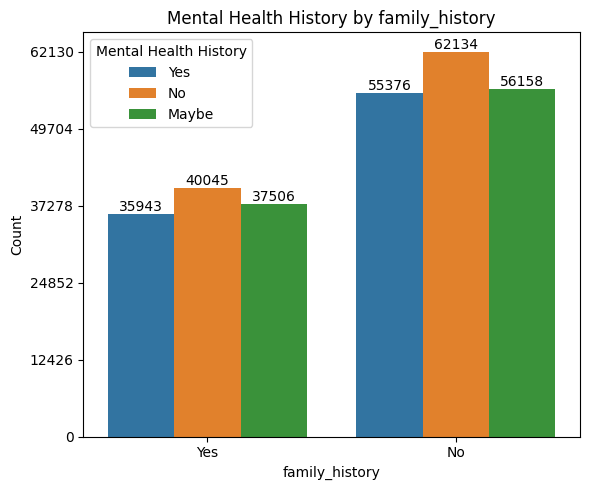

In [29]:
plt.figure(figsize=(6, 5))
ab2=sns.countplot(x='family_history', hue='Mental_Health_History',data=df)
for container in ab2.containers:
    ab2.bar_label(container)

max_count = gb2['Count2'].max()
plt.yticks(range(0, max_count+1, max_count//5))


plt.title('Mental Health History by family_history')
plt.xlabel('family_history')
plt.ylabel('Count')
plt.legend(title='Mental Health History')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# from above data, we can analyze that:
# Individuals with a family history of mental health issues tend to have a higher percentage (35.56%) of "Maybe" responses regarding their own 
# mental health history compared to those without a family history (31.08%).
# Both groups show relatively similar percentages of "No" responses, indicating denial of mental health history (34.27% for no family history, 
# 37.93% for family history).
# Individuals without a family history have a slightly higher percentage (34.65%) of "Yes" responses compared to those with a family histindicating a 
# higher acknowledgment of mental health history among individuals without a family history.

### Spending days indoor and outdoor's impact

In [30]:
gb3=df.groupby(['Days_Indoors', 'Mental_Health_History']).size().reset_index(name='Count3')
print(gb3)

          Days_Indoors Mental_Health_History  Count3
0            1-14 days                 Maybe   17824
1            1-14 days                    No   26427
2            1-14 days                   Yes   18178
3           15-30 days                 Maybe   15655
4           15-30 days                    No   16363
5           15-30 days                   Yes   20849
6           31-60 days                 Maybe   23357
7           31-60 days                    No   19772
8           31-60 days                   Yes   16496
9     Go out Every day                 Maybe   15758
10    Go out Every day                    No   21926
11    Go out Every day                   Yes   19639
12  More than 2 months                 Maybe   21070
13  More than 2 months                    No   17691
14  More than 2 months                   Yes   16157


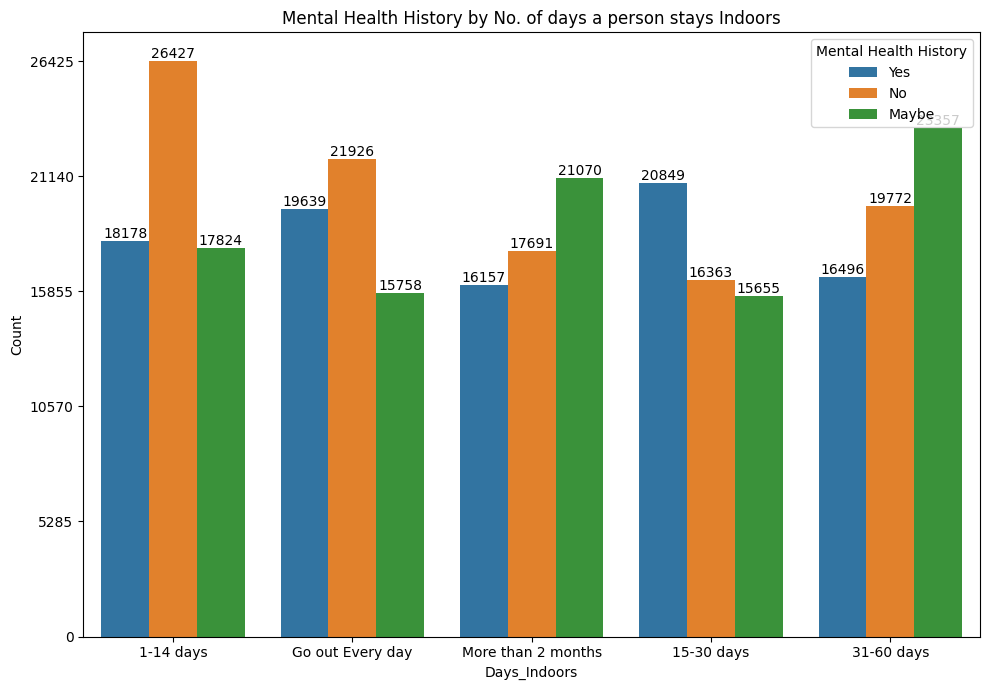

In [31]:
plt.figure(figsize=(10, 7))
ab3=sns.countplot(x='Days_Indoors', hue='Mental_Health_History',data=df)
for container in ab3.containers:
    ab3.bar_label(container)

max_count = gb3['Count3'].max()
plt.yticks(range(0, max_count+1, max_count//5))


plt.title('Mental Health History by No. of days a person stays Indoors')
plt.xlabel('Days_Indoors')
plt.ylabel('Count')
plt.legend(title='Mental Health History')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# From above data,we can analyze that:
# Individuals who spend "More than 2 months" indoors have the highest percentage (41.56%) of "Maybe" responses regarding their mental health history, 
# indicating uncertainty.
# Those who go out "Every day" have a higher percentage (51.43%) of "Yes" responses, indicating acknowledgment of mental health history.
# The distribution of "No" responses varies across different indoor activity levels.

In [32]:
gb4=df.groupby("Mental_Health_History").agg({"Growing_Stress":'unique',"Coping_Struggles":'unique',"Social_Weakness":'unique'})
print(gb4)

                         Growing_Stress Coping_Struggles   Social_Weakness
Mental_Health_History                                                     
Maybe                  [Yes, No, Maybe]        [No, Yes]  [Yes, Maybe, No]
No                     [No, Yes, Maybe]        [Yes, No]  [No, Maybe, Yes]
Yes                    [Yes, No, Maybe]        [No, Yes]  [Yes, Maybe, No]


### Growing stress's impact

In [33]:
gb5=df.groupby(['Growing_Stress', 'Mental_Health_History']).size().reset_index(name='Count5')
print(gb5)

  Growing_Stress Mental_Health_History  Count5
0          Maybe                 Maybe   31709
1          Maybe                    No   35678
2          Maybe                   Yes   30838
3             No                 Maybe   29613
4             No                    No   33642
5             No                   Yes   27828
6            Yes                 Maybe   32342
7            Yes                    No   32859
8            Yes                   Yes   32653


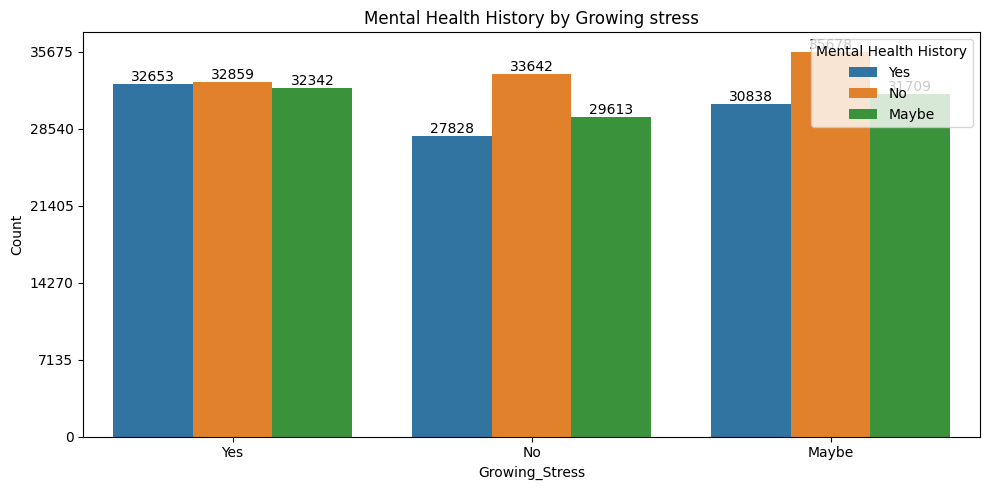

In [34]:
plt.figure(figsize=(10, 5))
ab4=sns.countplot(x='Growing_Stress', hue='Mental_Health_History',data=df)
for container in ab4.containers:
    ab4.bar_label(container)

max_count = gb5['Count5'].max()
plt.yticks(range(0, max_count+1, max_count//5))


plt.title('Mental Health History by Growing stress')
plt.xlabel('Growing_Stress')
plt.ylabel('Count')
plt.legend(title='Mental Health History')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show() 

In [ ]:
# From above data,we can analyze that:
# Individuals who perceive "Maybe" growing stress levels tend to have higher percentages of "Maybe" and "No" responses 
# regarding their mental health history compared to those with "No" or "Yes" growing stress perceptions.
# Those with "No" growing stress levels show relatively balanced percentages across "Maybe," "No," and "Yes" responses for mental health history.
# Respondents experiencing "Yes" growing stress levels have slightly higher percentages of "Yes" responses for mental health history 
# compared to "Maybe" and "No" growing stress levels.

### Coping struggles impact

In [35]:
gb6=df.groupby(['Coping_Struggles', 'Mental_Health_History']).size().reset_index(name='Count6')
print(gb6)

  Coping_Struggles Mental_Health_History  Count6
0               No                 Maybe   52646
1               No                    No   51348
2               No                   Yes   47615
3              Yes                 Maybe   41018
4              Yes                    No   50831
5              Yes                   Yes   43704


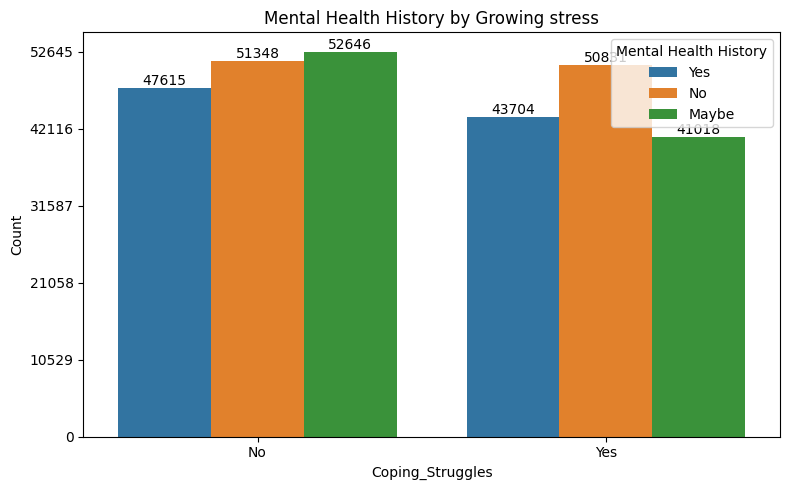

In [49]:
plt.figure(figsize=(8, 5))
ab5=sns.countplot(x='Coping_Struggles', hue='Mental_Health_History',data=df)
for container in ab5.containers:
    ab5.bar_label(container)

max_count = gb6['Count6'].max()
plt.yticks(range(0, max_count+1, max_count//5))


plt.title('Mental Health History by Growing stress')
plt.xlabel('Coping_Struggles')
plt.ylabel('Count')
plt.legend(title='Mental Health History')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show() 

In [ ]:
# From above data,we can analyze that:
# Individuals reporting coping struggles ("Yes" response) tend to have slightly higher percentages of "Maybe" 
# responses regarding their mental health history compared to those reporting no coping struggles ("No" response).
# The distribution of "No" responses for mental health history is relatively consistent across both coping struggles categories.
# Those reporting no coping struggles ("No" response) have slightly higher percentages of "Yes" responses regarding 
# mental health history compared to those reporting coping struggles ("Yes" response).

### Social weakness's impact

In [47]:
gb7=df.groupby(['Social_Weakness', 'Mental_Health_History']).size().reset_index(name='Count7')
print(gb7)

  Social_Weakness Mental_Health_History  Count7
0           Maybe                 Maybe   35560
1           Maybe                    No   35161
2           Maybe                   Yes   30838
3              No                 Maybe   30173
4              No                    No   31458
5              No                   Yes   33996
6             Yes                 Maybe   27931
7             Yes                    No   35560
8             Yes                   Yes   26485


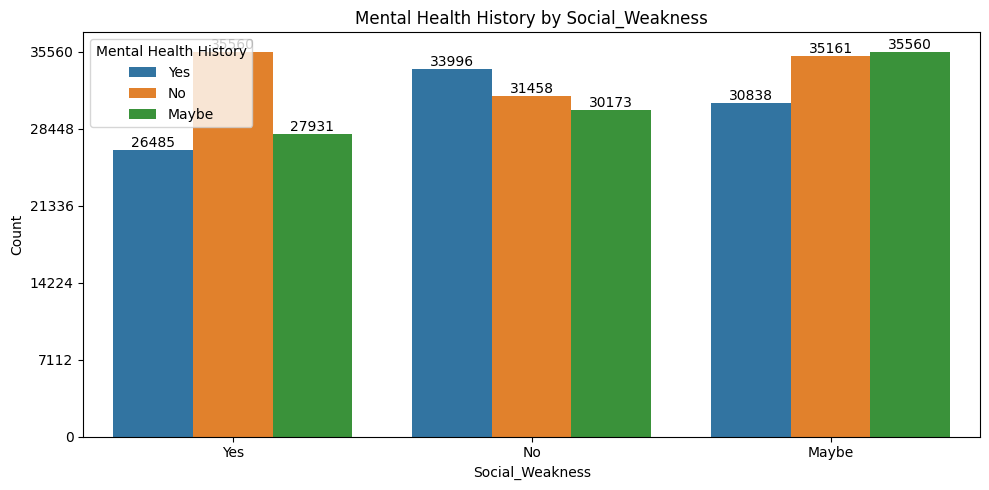

In [51]:
plt.figure(figsize=(10, 5))
ab6=sns.countplot(x='Social_Weakness', hue='Mental_Health_History',data=df)
for container in ab6.containers:
    ab6.bar_label(container)

max_count = gb7['Count7'].max()
plt.yticks(range(0, max_count+1, max_count//5))


plt.title('Mental Health History by Social_Weakness')
plt.xlabel('Social_Weakness')
plt.ylabel('Count')
plt.legend(title='Mental Health History')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show() 

In [ ]:
# From above data,we can analyze that:
# Individuals indicating social weakness ("Maybe" and "Yes" responses) tend to have higher percentages of "Maybe" responses 
# regarding their mental health history compared to those reporting no social weakness ("No" response).
# The distribution of "No" responses for mental health history varies across social weakness categories, with notable differences 
# between "No" and "Yes" responses.
# Those reporting social weakness ("Yes" response) have a higher percentage of "No" responses regarding mental health history 
# compared to "Maybe" and "No" social weakness responses.

# Conclusion:

In [ ]:
# The analysis reveals that various factors such as gender, occupation, self-employment status, family history, lifestyle factors 
# (such as days indoors and outdoor activity), growing stress, coping struggles, and social weakness are associated with individuals' 
# perceptions of their mental health history. 
# While there are nuanced differences across these factors, a common theme emerges regarding uncertainty ("Maybe" responses) in mental health history 
# perceptions. This suggests a need for targeted interventions, including mental health education, awareness programs, stress management strategies, 
# and support systems tailored to the specific needs and challenges faced by different demographic and lifestyle groups.